# Importing tools

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# loading and seeing the description

In [2]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target

# Linear Support Vector Machines

<img src="img/svm.jpg" >

#### Importance
* for classification and regression (SVCs, SVRs)
* can be applied on linear and non-linear data
* look for the best separating line or decision boundary
* look for the largest margin

#### Commonly used kernels:
* linear
* polynomial
* radial basis function (RBF) - Gaussian RBF
* sigmoid, etc.

In [3]:
from sklearn.svm import LinearSVC
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)

In [4]:
ls=LinearSVC(C=0.0001,random_state=0).fit(X_train,y_train)
print('Accuracy on the training dataset: {:.3f}' .format(ls.score(X_train,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(ls.score(X_test,y_test)))

Accuracy on the training dataset: 0.923
Accuracy on the testing dataset: 0.923


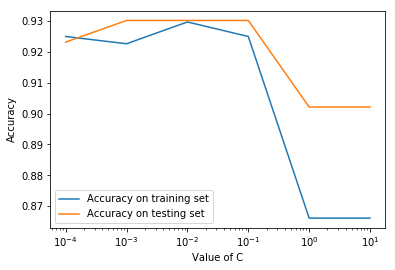

In [5]:
C_range = np.logspace(-4,1,6)

score1=[]
score2=[]
for C in C_range:
    ls=LinearSVC(C=C,random_state=42).fit(X_train,y_train)
    score1.append(ls.score(X_train,y_train))
    score2.append(ls.score(X_test,y_test))
    
%matplotlib inline
plt.plot(C_range,score1,label= 'Accuracy on training set')
plt.plot(C_range,score2,label= 'Accuracy on testing set')
plt.xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
ls=LinearSVC(C=0.01,random_state=42).fit(X_train,y_train)
print('Accuracy on the training dataset: {:.3f}' .format(ls.score(X_train,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(ls.score(X_test,y_test)))

Accuracy on the training dataset: 0.930
Accuracy on the testing dataset: 0.930


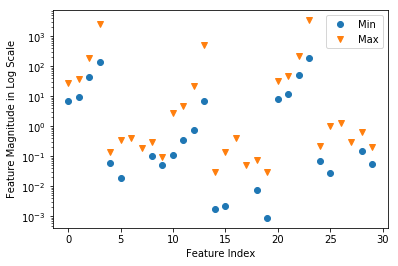

In [7]:
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

ls=LinearSVC(C=0.01,random_state=42).fit(X_train_scaled,y_train)
print('Accuracy on the training dataset: {:.3f}' .format(ls.score(X_train_scaled,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(ls.score(X_test_scaled,y_test)))

Accuracy on the training dataset: 0.934
Accuracy on the testing dataset: 0.930


# Support Vector Machines to unnormalized data

In [9]:
from sklearn.svm import SVC
clf=SVC(C=10).fit(X_train,y_train)
print('Accuracy on the training dataset: {:.3f}' .format(clf.score(X_train,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(clf.score(X_test,y_test)))

Accuracy on the training dataset: 1.000
Accuracy on the testing dataset: 0.629


### here as the training dataset is overfitted so we need to normalise it

## Application of SVMs : normalized data with feature preprocessing using minmax scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=SVC(C=10,random_state=42).fit(X_train_scaled,y_train)
print('Accuracy on the training dataset: {:.3f}' .format(clf.score(X_train_scaled,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(clf.score(X_test_scaled,y_test)))

Accuracy on the training dataset: 0.981
Accuracy on the testing dataset: 0.958


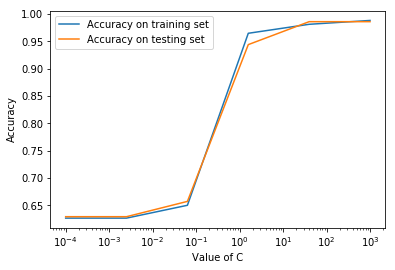

In [12]:
C_range = np.logspace(-4,3,6)

score1=[]
score2=[]
for C in C_range:
    clf=SVC(C=C,random_state=42).fit(X_train_scaled,y_train)
    score1.append(clf.score(X_train_scaled,y_train))
    score2.append(clf.score(X_test_scaled,y_test))
    
%matplotlib inline
plt.plot(C_range,score1,label= 'Accuracy on training set')
plt.plot(C_range,score2,label= 'Accuracy on testing set')
plt.xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()

In [14]:
clf=SVC(C=1000,random_state=42).fit(X_train_scaled,y_train)
print('Accuracy on the training dataset: {:.3f}' .format(clf.score(X_train_scaled,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(clf.score(X_test_scaled,y_test)))

Accuracy on the training dataset: 0.988
Accuracy on the testing dataset: 0.986
